# Regression



Recall that all supervised learning is based on the assumption that there is a relationship between the input variables $X$ and the output variable $y$ i.e. 

$$\textbf{y} = f(\textbf{X})$$

where $f$ is some unknown function.

$X$ here simply is some data that we have as a `pd.DataFrame` whereas $y$ here is the target variable, one value for each observation, that we want to predict, as of type `pd.Series`.

<img  width="80%" align="center"  src="https://raw.githubusercontent.com/fahadsultan/datascience_ml/main/assets/supervised2.png">

The form of **supervised learning** we have talked about so far is **classification**. As discussed previously, in classification, the output variable $y$ is a **discrete target variable** e.g. sentiment $\in$ {positive, neutral or negative},  ring $\in$ {A, B} or diagnosis $\in$ {malignant, benign} etc.

The other type of supervised learning that we will talk about in this notebook is called **Regression**. In regression, the target variable is to predict a **continuous target variable** i.e. $$\mathbf{y} \in \mathbb{R^N}$$. 

For example, predicting the stock price of a publicly listed company, predicting the price of a house in dollars, or predicting the average surface temperature on Earth next year are all examples of regression problems.

Note that the **splitting of the data into training and test sets is exactly the same as in classification**. The only difference is that the target variable is continuous instead of discrete.

<img src="https://raw.githubusercontent.com/fahadsultan/datascience_ml/main/assets/training.png" width="70%" align="center">

### Linear Regression

Linear Regression is the simplest solution to any regression problem. 

In linear regression, the relationship between the input variable(s) $X$ and the output variable $y$ is assumed to be a linear. 

#### Univariate Linear Regression

For simplicity, let's assume we only have one input variable $x$ and one output variable $y$.

Our goal, then is to find a linear function $f$ that maps $x$ to $y$:

$$\mathbf{y} = f(\mathbf{x})$$

Recall that the equation for a straight line is $ f(x) = mx + b $

where $m$ is the slope of the line and $b$ is the y-intercept. Assuming that $f$ is a linear function, we can write: 

$$\mathbf{y} = f(\mathbf{x}) = \mathbf{m} \cdot \mathbf{x} + b$$

Expanding this equation for each observation in our dataset, we get:

$$\begin{bmatrix} y_1 \\ y_2 \\ \vdots \\ y_n \end{bmatrix} = m \times \begin{bmatrix} x_1 \\ x_2 \\ \vdots \\ x_n \end{bmatrix} + b$$

where $n$ is the number of observations in our dataset.

The goal of linear regression is to find the values of $m$ and $b$ that best fit the data.

The cell code below plots y vs x where $y=mx + b$ for a given value of $m$ and $b$.

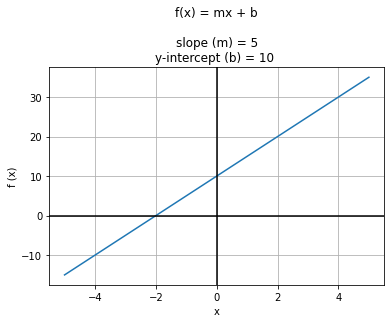

In [8]:
from matplotlib import pyplot as plt 
import pandas as pd 
import seaborn as sns

m = 5
b = 10

df = pd.DataFrame()
df['x'] = range(-5, 6)
df['f (x)'] = m * df['x'] + b

sns.lineplot(x='x', y='f (x)', data=df);

plt.axhline(0, color='black');
plt.axvline(0, color='black');

plt.title("f(x) = mx + b\n\nslope (m) = %s\ny-intercept (b) = %s " % (m, b));
plt.grid()

Now let's load a dataset and try to find the best values of $m$ and $b$ that fit the data.

The code below loads a dataset of Average Land Temperature on each country for each year from 1750 to 2015.

The temperature is in degrees Celsius. Below these temperatures are aggregated and global averages are calculated for each year.  

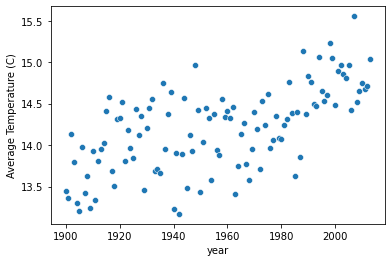

In [9]:
import pandas as pd

data         = pd.read_csv('../data/GlobalLandTemperaturesByCountry.csv')
data['dt']   = pd.to_datetime(data['dt'])
data['year'] = data['dt'].apply(lambda x: x.year)
data['month']= data['dt'].apply(lambda x: x.month)
data         = data.dropna()
data         = data[(data['year'] >= 1900) & (data['month'] == 1)]
avgs         = data.groupby('year').mean()['AverageTemperature']
avgs.name    = 'Average Temperature (C)'

sns.scatterplot(x=avgs.index, y=avgs);

In the code below, the data is split into training and test sets, similar to what we did in the classification examples for Naive Bayes and Nearest Neighbor models.

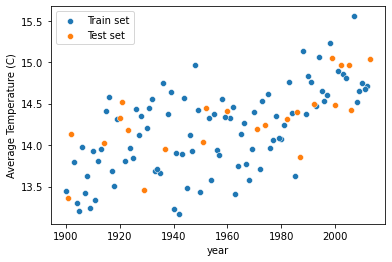

In [10]:
train_pct = 0.8
train_size = int(train_pct * len(avgs))
train_set = avgs.sample(train_size, random_state=42)
test_set  = avgs[~avgs.index.isin(train_set.index)]

X_train = train_set.index
y_train = train_set

X_test = test_set.index
y_test = test_set

sns.scatterplot(x=X_train, y=y_train, label='Train set');
sns.scatterplot(x=X_test,  y=y_test,  label='Test set');

In the code cell below, two linear functions are plotted against the training data. Both implement the same linear function $f(x) = mx + b$ but with different values of $m$ and $b$.

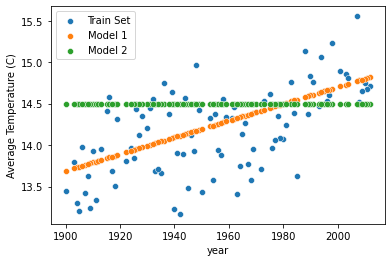

In [11]:
sns.scatterplot(x=X_train, y=y_train,  label='Train Set');

b = -5.5
m = 0.0101
model1 = m * X_train + b
sns.scatterplot(x=X_train, y=model1.values,  label='Model 1');


b = 14.5
m = 0
model2 = m * X_train + b
sns.scatterplot(x=X_train, y=model2.values,  label='Model 2');

#### Errors in Regression

The evaluation of regression models is done similar to classification models. The model is trained on the training set and then evaluated on the test set. 

<img src="https://raw.githubusercontent.com/fahadsultan/datascience_ml/main/assets/testing.png" width="70%" align="center">

The difference is that the training has an **internal evaluation metric that is minimized to find the values of coefficients such as $m$ and $b$ that best fit the training data**.

For example, model-1 and model-2 above would yield different scores for how well they fit the training data. The model with the lowest score is the one that best fits the training data.

Once the model is trained, the test set is used to evaluate the model.

The internal evaluation metrics for linear regression during training are similar to the ones used in extrinsic evaluation on the test set.

The most common evaluation metrics for linear regression are as follows: 

##### Residuals 

Residuals are the difference between the true values of y and the predicted values of y.

$$\text{Residual}_i = y_i - \hat{y}_i$$

where $y_i$ is the $i^{th}$ true value of the target variable and $\hat{y_i}$ is the $i^{th}$ predicted value of the target variable i.e. $$\hat{y_i} = m x_i + b$$

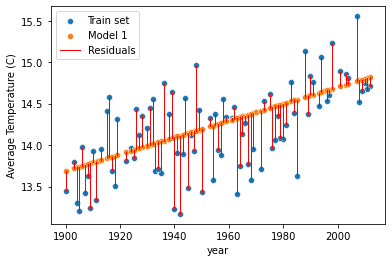

In [12]:
df = pd.DataFrame()
df['y'] = y_train
df['model1'] = model1
df['model2'] = model2

sns.scatterplot(x=X_train, y=y_train);
sns.scatterplot(x=X_train, y=model1.values);
df.apply(lambda x: plt.plot((x.name, x.name), (x['y'], x['model1']), color='red', linewidth=1), axis=1);
plt.legend(['Train set', 'Model 1', 'Residuals']);

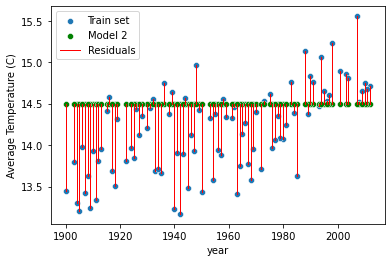

In [13]:
sns.scatterplot(x=X_train, y=y_train);
sns.scatterplot(x=X_train, y=model2.values, color='green');
df.apply(lambda x: plt.plot((x.name, x.name), (x['y'], x['model2']), color='red', linewidth=1), axis=1);
plt.legend(['Train set', 'Model 2', 'Residuals']);

##### Mean Absolute Error

The Mean Absolute Error (or MAE) is the average of the absolute differences between predictions and actual values. It gives an idea of how wrong the predictions were. The measure gives an idea of the magnitude of the error, but no idea of the direction (e.g. over or under predicting).


$$MAE = \frac{1}{n}\sum_{i=1}^{n}|\text{residual}_i|$$

or 

$$MAE = \frac{1}{n}\sum_{i=1}^{n}|y_i - \hat{y}_i|$$

In the code cell below, two linear functions are plotted against the training data. Both implement the same linear function $f(x) = mx + b$ but with different values of $m$ and $b$.

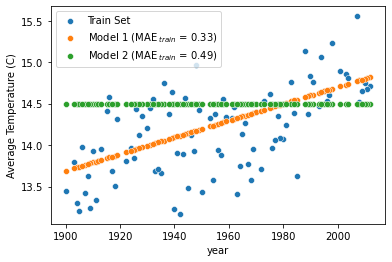

In [14]:
sns.scatterplot(x=X_train, y=y_train,  label='Train Set');

def mae(y, y_hat):
    return sum(abs(y - y_hat)) / len(y)

b = -5.5
m = 0.0101
model1 = m * X_train + b
mae_model1 = mae(y_train, model1)
sns.scatterplot(x=X_train, y=model1.values,  label=r'Model 1 (MAE$_{~train}$ = %s)' % round(mae_model1, 2));


b = 14.5
m = 0
model2 = m * X_train + b
mae_model2 = mae(y_train, model2)
sns.scatterplot(x=X_train, y=model2.values,  label=r'Model 2 (MAE$_{~train}$ = %s)' % round(mae_model2, 2));

In order to find the best values of $m$ and $b$, we need to define an evaluation metric that we want to minimize.

The code cell below plots model 1 and model 2 against the **test set** and also calculates the MAE for each model.

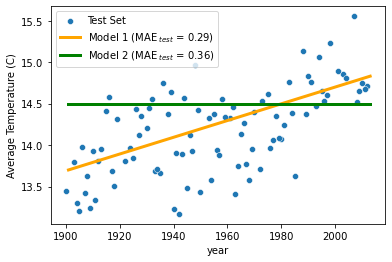

In [15]:
sns.scatterplot(x=X_train, y=y_train,  label='Test Set');

def mae(y, y_hat):
    return sum(abs(y - y_hat)) / len(y)

b = -5.5
m = 0.0101
model1 = m * X_test + b
mae_model1 = mae(y_test, model1)
sns.lineplot(x=X_test, y=model1.values, linewidth=3,\
             label=r'Model 1 (MAE$_{~test}$ = %s)' % round(mae_model1, 2), color='orange');


b = 14.5
m = 0
model2 = m * X_test + b
mae_model2 = mae(y_test, model2)
sns.lineplot(x=X_test, y=model2.values, linewidth=3,  \
             label=r'Model 2 (MAE$_{~test}$ = %s)' % round(mae_model2, 2), color='green');

##### Mean Squared Error

The Mean Squared Error (or MSE) is much like the mean absolute error in that it provides a gross idea of the magnitude of error. 


$$MSE = \frac{1}{n}\sum_{i=1}^{n}(\text{Residual}_i)^2$$

or 

$$MSE = \frac{1}{n}\sum_{i=1}^{n}(y_i - \hat{y}_i)^2$$

In [16]:
def mse(y, y_hat):
    return sum((y - y_hat)**2) / len(y)

mse1 = mse(df['y'], df['model1'])
mse2 = mse(df['y'], df['model2'])

print(" MSE model 1: ", round(mse1, 2), "\n", "MSE model 2: ", round(mse2, 2))

 MSE model 1:  0.17 
 MSE model 2:  0.37


##### Root Mean Squared Error

Taking the square root of the mean squared error converts the units back to the original units of the output variable and can be meaningful for description and presentation. This is called the Root Mean Squared Error (or RMSE).


$$RMSE = \sqrt{\frac{1}{n}\sum_{i=1}^{n}(\text{Residual}_i)^2}$$

or

$$RMSE = \sqrt{\frac{1}{n}\sum_{i=1}^{n}(y_i - \hat{y}_i)^2}$$


In [18]:
def rmse(y, y_hat):
    return (sum((y - y_hat)**2) / len(y))**(1/2)

mse1 = rmse(df['y'], df['model1'])
mse2 = rmse(df['y'], df['model2'])

print(" RMSE model 1: ", round(mse1, 2), "\n", "RMSE model 2: ", round(mse2, 2))

 RMSE model 1:  0.41 
 RMSE model 2:  0.61




##### $\text{R}^2$ 

The $\text{R}^2$ (or R Squared) metric provides an indication of the goodness of fit of a set of predictions to the actual values. In statistical literature, this measure is called the coefficient of determination. This is a value between 0 and 1 for no-fit and perfect fit respectively.

$$\text{R}^2 = 1 - \frac{\sum_{i=1}^{n}(y_i - \hat{y}_i)^2}{\sum_{i=1}^{n}(y_i - \bar{y})^2}$$

where $\bar{y} = \frac{1}{n}\sum_{i=1}^{n}y_i$ is the mean of the observed data.



In [19]:
def r2(y, y_hat):
    return 1 - sum((y - y_hat)**2) / sum((y - y.mean())**2)

r2_1 = r2(df['y'], df['model1'])
r2_2 = r2(df['y'], df['model2'])

print(" R2 model 1: ", round(r2_1, 2), "\n", "R2 model 2: ", round(r2_2, 2))

 R2 model 1:  0.36 
 R2 model 2:  -0.4


### Multivariate Regression

Multiple linear regression (MLR), also known simply as multiple regression,  uses multiple (> 1) input variables ($X$) to predict the outcome of a target variable ($y \in \mathbb{R}$) by fitting a linear equation to observed data.

$$\mathbf{y} = f(\mathbf{X})$$

Here $f$ is a linear function of the form:

$$f(\mathbf{X}) = \mathbf{X}\mathbf{m} + b$$

where $X$ is a matrix of $N$ observations and $D$ features and $y$ is a vector of $N$ observations.

$$X = \begin{bmatrix}
x_{11} & x_{12} & \dots & x_{1D} \\
x_{21} & x_{22} & \dots & x_{2D} \\
\vdots & \vdots & \ddots & \vdots \\
x_{N1} & x_{N2} & \dots & x_{ND} \\
\end{bmatrix}$$

$$y = \begin{bmatrix}
y_1 \\
y_2 \\
\vdots \\
y_N \\
\end{bmatrix}$$


where $\mathbf{m}$ is a vector of $D$ slopes and $b$ is the y-intercept. i.e. 

$$\mathbf{m} = \begin{bmatrix}
m_1 \\
m_2 \\
\vdots \\
m_D \\
\end{bmatrix}$$

Putting it all together, we get:

$$\begin{bmatrix}
y_1 \\
y_2 \\
\vdots \\
y_N \\
\end{bmatrix} = \begin{bmatrix}
x_{11} & x_{12} & \dots & x_{1D} \\
x_{21} & x_{22} & \dots & x_{2D} \\
\vdots & \vdots & \ddots & \vdots \\
x_{N1} & x_{N2} & \dots & x_{ND} \\
\end{bmatrix} \begin{bmatrix}
m_1 \\
m_2 \\
\vdots \\
m_D \\
\end{bmatrix} + b$$


The goal of multiple linear regression is to find the values of $m_1, m_2, \dots, m_D$ and $b$ that best fit the data.

<br/>

Now let's load a dataset and try to find the best values of $m_1$ and $b$ that fit the data.


<!-- The code cell below uses data from the [Boston Housing Dataset](https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html) to predict the median value of owner-occupied homes in Boston in the mid-1970s given the following input variables:

- CRIM: per capita crime rate by town.
- ZN: proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS: proportion of non-retail business acres per town.
- CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).
- NOX: nitric oxides concentration (parts per 10 million).
- RM: average number of rooms per dwelling.
- AGE: proportion of owner-occupied units built prior to 1940.
- DIS: weighted mean of distances to five Boston employment centres.
- RAD: index of accessibility to radial highways.
- TAX: full-value property-tax rate per \$10,000.
- PTRATIO: pupil-teacher ratio by town.

The target variable is:

- MEDV: median value of owner-occupied homes in \$1000s. -->


The code below uses data from California Housing Dataset to predict the median house value in California districts given the following input variables:

1. MedInc: Median income in block.
2. HouseAge: Median house age within a block (measured in years).
3. AveRooms: Average number of rooms within a block of houses.
4. AveBedrms: Average number of bedrooms within a block of houses.
5. Population: Total number of people residing within a block.
6. AveOccup: Average number of people occupying each house within a block.
7. Longitude: A measure of how far west a house is; a higher value is farther west.
8. Latitude: A measure of how far north a house is; a higher value is farther north.

The target variable is:

- Median house value for households within a block (measured in US Dollars).


In [20]:
import pandas as pd 
from sklearn import  datasets

california = datasets.fetch_california_housing()
X = pd.DataFrame(california.data, columns=california.feature_names)
y = pd.Series(california.target, name='Price')

In [21]:
X.shape

(20640, 8)

In [22]:
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [23]:
y.head()

0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: Price, dtype: float64

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

X_train, X_test, y_train, y_test = train_test_split(X, y)

model = LinearRegression()

model.fit(X_train, y_train)

y_hat = model.predict(X_test)

print("MAE: ",  round(mean_absolute_error(y_test, y_hat), 2))
print("MSE: ",  round(mean_squared_error(y_test, y_hat), 2))
print("RMSE:",  round((mean_squared_error(y_test, y_hat))**(1/2), 2))
print("R2:  ",  round(r2_score(y_test, y_hat), 2))


MAE:  0.53
MSE:  0.51
RMSE: 0.71
R2:   0.62


Choosing between these metrics depends on the specific context of the problem:

* Use MAE if you want a metric that's easy to understand and not influenced much by outliers.
* Use RMSE when larger errors should be penalized more heavily and a metric in the same unit as the target variable is desired.
* Use MSE when optimizing models since it emphasizes larger errors, making it useful in minimizing those errors during training

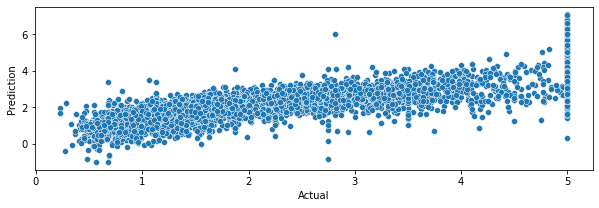

In [25]:
results = pd.DataFrame()
results['Actual'] = y_test
results['Prediction'] = y_hat

import seaborn as sns
from matplotlib import pyplot as plt
plt.figure(figsize=(10, 3))
sns.scatterplot(x='Actual', y='Prediction', data=results);

## Interpreting the Model

The model we have trained is a linear function of the form:

$$\text{MedianHouseValue} = (m_1 \times \text{MedInc}) + (m_2 \times \text{HouseAge}) + \\(m_3 \times \text{AveRooms}) + (m_4 \times \text{AveBedrms}) + \\(m_5 \times \text{Population}) + (m_6 \times \text{AveOccup}) + \\(m_7 \times \text{Longitude}) + (m_8 \times \text{Latitude}) + b$$

where $m_1, m_2, \dots, m_8$ are the slopes and $b$ is the y-intercept.

The slopes $m_1, m_2, \dots, m_8$ tell us how much the target variable changes when the corresponding input variable changes by 1 unit.

The code cell below plots the slopes in decreasing order of magnitude. 

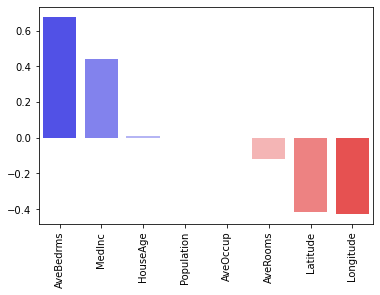

In [29]:
weights = pd.Series(model.coef_, index=X.columns)
weights = weights.sort_values(ascending=False)
sns.barplot(x=weights.index, y=weights.values, palette='bwr');
plt.xticks(rotation=90);

The plot indicates that `AveBedrms`, `MedInc` and `AveRooms` have the **highest positive relationship** with the Price of the house whereas `AveRooms`, `Latitude`, `Longitude` have the **strongest negative relationship** with the target variable Price of the house.


## Polynomial Regression

Polynomial functions are functions that have the form:

$$f(x) = b + m_1 x + m_2 x^2 + m_3 x^3 + ... + m_n x^n$$

where $b, m_1, m_2, m_3, ..., w_n$ are the coefficients of the polynomial function and $n$ is called the **degree of the polynomial**.  In other words, the degree of a polynomial function is the **highest power of the variable** in the polynomial function.

Note that the linear function $f(x) = mx + b$ is a special case of the polynomial function. More specifically, a linear function is a polynomial function of degree 1.

Polynomial functions of degree 2 or higher are called **non-linear functions**. As the degree of the polynomial function increases, the function becomes more flexible and can fit more complex patterns in the data.

If we have only one input variable $x$ to predict the output variable $y$, then the polynomial function becomes:

$$y = f(x) = b + m_1 x + m_2 x^2 + m_3 x^3 + ... + m_n x^n$$

In matrix notation, polynomial regression can be written as: 

$$f(\mathbf{x}) = \mathbf{X}\mathbf{m} + b$$

where $\mathbf{X}$ is a matrix of $N$ observations and each feature is raised to a power from 1 to $D$.

$$\begin{bmatrix}
y_1 \\
y_2 \\
\vdots \\
y_N \\
\end{bmatrix}  = \begin{bmatrix}
 x_1 & x_1^2 & x_1^3 & \dots & x_1^D \\
x_2 & x_2^2 & x_2^3 & \dots & x_2^D \\
\vdots & \vdots & \vdots & \vdots & \ddots & \vdots \\
x_N & x_N^2 & x_N^3 & \dots & x_N^D \\
\end{bmatrix} \cdot \begin{bmatrix}
m_1 \\
m_2 \\
\vdots \\
m_D \\
\end{bmatrix} + b$$


### Code Example

Let's implement polynomial regression on the Average Land Temperature dataset.

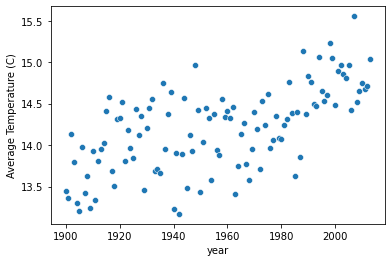

In [30]:
import pandas as pd

data         = pd.read_csv('../data/GlobalLandTemperaturesByCountry.csv')
data['dt']   = pd.to_datetime(data['dt'])
data['year'] = data['dt'].apply(lambda x: x.year)
data['month']= data['dt'].apply(lambda x: x.month)
data         = data.dropna()
data         = data[(data['year'] >= 1900) & (data['month'] == 1)]
avgs         = data.groupby('year').mean()['AverageTemperature']
avgs.name    = 'Average Temperature (C)'

sns.scatterplot(x=avgs.index, y=avgs);

In [31]:
X = avgs.index.values.reshape(-1, 1)
y = avgs

In [32]:
annual_means = data.groupby('year').mean()['AverageTemperature'][::10]

X = annual_means.index.values.reshape(-1, 1)
y = annual_means.values

In [33]:
train_set = avgs.sample(int(0.8*len(avgs)), random_state=42).sort_index()
test_set  = avgs.drop(train_set.index).sort_index()

X_train   = train_set.index.values.reshape(-1, 1)
y_train   = train_set.values.reshape(-1, 1)

X_test    = test_set.index.values.reshape(-1, 1)
y_test    = test_set.values.reshape(-1, 1)

Implementing polynomial regression in `sklearn` is similar to linear regression but with one additional step. We need to transform the input data into a polynomial matrix before fitting the model. In `sklearn`, this is done using the `PolynomialFeatures` class. 

The code cell below implements polynomial regression of degrees 1, 2 and 5 on the Average Land Temperature dataset.

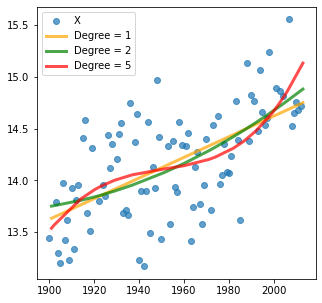

In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

plt.figure(figsize=(5, 5))
plt.scatter(X_train, y_train, label='X', alpha=0.7);

colors = ['orange', 'green', 'red']

for i, degree in enumerate([1, 2, 5]):

    # Create polynomial features for X_train and X_test
    poly         = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly  = poly.fit_transform(X_test)

    # Fit a linear regression model to the training data
    model        = LinearRegression()
    model.fit(X_train_poly, y_train)

    # Predict y values for X_test
    y_pred       = model.predict(X_test_poly)
    
    # Plot the predictions
    plt.plot(X_test, y_pred, linewidth=3, label='Degree = %s' % degree, alpha=0.7, color=colors[i]);

plt.legend();


Note that with increasing degree, the polynomial function can fit more complex patterns non-linear trends in the data. 

## Underfitting vs. Overfitting

This example demonstrates the problems of underfitting and overfitting and how we can use linear regression with polynomial features to approximate nonlinear functions. 

The plot shows the function that we want to approximate, which is a part of the cosine function. In addition, the samples from the real function and the approximations of different models are displayed. The models have polynomial features of different degrees. We can see that a linear function (polynomial with degree 1) is not sufficient to fit the training samples. This is called **underfitting**. 

A polynomial of degree 4 approximates the true function almost perfectly. However, for higher degrees the model will overfit the training data, i.e. it learns the noise of the training data. This is called **overfitting**. We evaluate quantitatively overfitting / underfitting by using cross-validation. 

We calculate the mean squared error (MSE) on the validation set, the higher, the less likely the model generalizes correctly from the training data.

In [35]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures


def true_fun(X):
    return np.cos(1.5 * np.pi * X)


np.random.seed(0)

n_samples = 30
degrees = [1, 4, 15]

X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.1

In [36]:
# X2 = data.groupby('year').mean()['AverageTemperature']

# X = X2.index.values.reshape(-1, 1)
# y = X2.values

In [37]:
y.shape, X.shape

((30,), (30,))

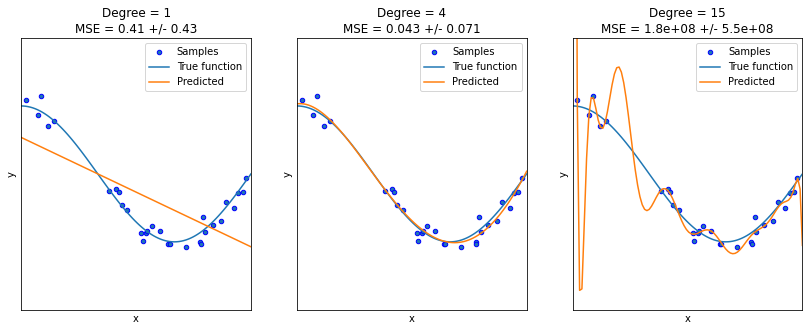

In [38]:

plt.figure(figsize=(14, 5))
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline(
        [
            ("polynomial_features", polynomial_features),
            ("linear_regression", linear_regression),
        ]
    )
    pipeline.fit(X[:, np.newaxis], y)

    # Evaluate the models using crossvalidation
    scores = cross_val_score(
        pipeline, X[:, np.newaxis], y, scoring="neg_mean_squared_error", cv=10
    )

    X_test = np.linspace(0, 1, 100)
    plt.scatter(X, y, edgecolor="b", s=20, label="Samples")
    plt.plot(X_test, true_fun(X_test), label="True function")
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Predicted")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")
    ax.set_title(
        "Degree = {}\nMSE = {:.2} +/- {:.2}".format(
            degrees[i], -scores.mean(), scores.std()
        )
    )
plt.show()

Ideally, you want to strike a balance between underfitting (high training error, high testing error) and overfitting (low training error, high testing error) by picking a model complexity (number of parameters) that generalizes well to unseen data.

<img align="center" width="70%" src="https://cdn.analyticsvidhya.com/wp-content/uploads/2020/02/Screenshot-2020-02-06-at-11.09.13.png">

Note that model complexity here refers to the number of parameters in the model. For example, univariate linear regression model has 2 parameters (slope and y-intercept) whereas a polynomial regression model of degree 2 has 3 parameters (slope, y-intercept and coefficient of $x^2$).